In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances

In [8]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)# default test_size=0.25
X_train.shape, X_test.shape
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

((512, 30), (57, 30))

Threefold split Hyper-Parameters

In [9]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((460, 30), (52, 30), (57, 30))

In [31]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print(f"Best validation score: {np.max(val_scores):.3f}")
best_param_ = neighbors[np.argmax(val_scores)]
print(f"Best n_neighbors: {best_param_}")

knn = KNeighborsClassifier(n_neighbors=best_param_)
knn.fit(X_trainval, y_trainval)
print(f"Test Score of trained knn on trainval set: {knn.score(X_test, y_test):.3f}")

Best validation score: 0.923
Best n_neighbors: 3
Test Score of trained knn on trainval set: 0.965


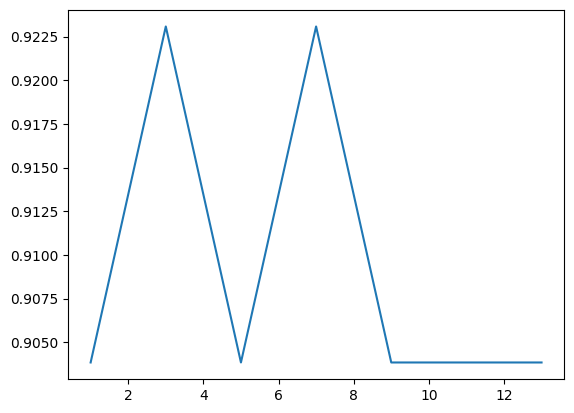

In [32]:
plt.plot(neighbors, val_scores)

Gridsearch with cross-validation

In [65]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cross_val_scores = []
neighbors = np.arange(1, 8, 2)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
print(f"Best cross-validation score: {np.max(cross_val_scores):.3f}")
best_param_ = neighbors[np.argmax(cross_val_scores)]
print(f"Best n_neighbor param: {best_param_}")

knn = KNeighborsClassifier(n_neighbors=best_param_)
knn.fit(X_train, y_train)
print(f"Test score for the model trained: {knn.score(X_test, y_test):.3f}")

Best cross-validation score: 0.927
Best n_neighbor param: 3
Test score for the model trained: 0.930


GridsearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

param_grid = {'n_neighbors': np.arange(1, 30, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=15, return_train_score=True)
grid.fit(X_train, y_train)

print(f"Best score obtained: {grid.best_score_:.3f}")
print(f"Best params: {grid.best_params_}")

print(f"Test score is {grid.score(X_test, y_test):.3f}")

Best score obtained: 0.965
Best params: {'n_neighbors': 9}
Test score is 0.972


In [73]:
results = pd.DataFrame(grid.cv_results_)
results.shape, results.columns

((15, 41),
 Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
        'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
        'split2_test_score', 'split3_test_score', 'split4_test_score',
        'split5_test_score', 'split6_test_score', 'split7_test_score',
        'split8_test_score', 'split9_test_score', 'split10_test_score',
        'split11_test_score', 'split12_test_score', 'split13_test_score',
        'split14_test_score', 'mean_test_score', 'std_test_score',
        'rank_test_score', 'split0_train_score', 'split1_train_score',
        'split2_train_score', 'split3_train_score', 'split4_train_score',
        'split5_train_score', 'split6_train_score', 'split7_train_score',
        'split8_train_score', 'split9_train_score', 'split10_train_score',
        'split11_train_score', 'split12_train_score', 'split13_train_score',
        'split14_train_score', 'mean_train_score', 'std_train_score'],
       dtype='object'))

In [78]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold

kfold = KFold(n_splits=5)
stfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

print(f"Kfold: {np.max(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold)):.3f}")

print(f"StratifiedKfold: {np.max(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=stfold)):.3f}")

print(f"ShuffleSplit: {np.max(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=ss)):.3f}")

print(f"RepeatedStratifiedKfold: {np.max(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=rs)):.3f}")

Kfold: 0.988
StratifiedKfold: 0.976
ShuffleSplit: 0.984
RepeatedStratifiedKfold: 1.000


In [85]:
from sklearn.model_selection import cross_validate

param_grid = {'n_neighbors': np.arange(1, 11, 2)}
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True, cv=7, scoring=['accuracy', 'roc_auc'])

res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.002012,0.022485,0.926829,0.950719,0.948767,0.991433
1,0.001017,0.016991,0.853659,0.956879,0.948767,0.991740
2,0.000000,0.012999,0.962963,0.942623,0.960131,0.991615
3,0.000979,0.015220,0.925926,0.950820,0.976144,0.990995
4,0.000000,0.014003,0.962963,0.938525,0.978758,0.990394
5,0.000000,0.015430,0.901235,0.950820,0.933660,0.992539
6,0.000998,0.013002,0.962963,0.940574,0.976797,0.990232
